# Supervised Learning and Linear Regression

Supervised learning is a type of machine learning where an algorithm learns from labeled training data. The model is provided with input-output pairs, allowing it to learn patterns and make predictions on unseen data. Regression is a key technique in supervised learning, used to predict continuous values.

## Linear Regression
Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to find the best-fitting line that minimizes the error between predictions and actual values.

### 1. Simple Linear Regression
Simple linear regression involves a single independent variable (feature) to predict a dependent variable. The relationship is represented by the equation:

$$ y = mx + c $$

Where:
- \( y \) is the dependent variable (prediction),
- \( x \) is the independent variable (input feature),
- \( m \) is the slope (coefficient),
- \( c \) is the intercept.

The model fits a straight line to the data using the least squares method to minimize the error.

#### Implementation in Python:
```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable
y = np.array([2, 4, 5, 4, 6])  # Dependent variable

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()
```

### 2. Multiple Linear Regression
Multiple linear regression extends simple linear regression by using multiple independent variables. The equation takes the form:

$$ y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n $$

Where:
- \( y \) is the dependent variable,
- \( x_1, x_2, ..., x_n \) are independent variables,
- \( b_0 \) is the intercept,
- \( b_1, b_2, ..., b_n \) are coefficients (weights).

This technique helps model complex relationships, providing better predictions when multiple factors influence the outcome.

#### Implementation in Python:
```python
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample dataset
data = {'X1': [1, 2, 3, 4, 5], 'X2': [2, 3, 4, 5, 6], 'y': [3, 6, 7, 8, 11]}
df = pd.DataFrame(data)

# Independent and dependent variables
X = df[['X1', 'X2']]
y = df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Predictions:", y_pred)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('dataset/appliance_energy.csv')

# Display the first few rows to understand the structure
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [3]:
print(df.isnull().sum())
df  = df.dropna()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [4]:
# Features (independent variable) and target (dependent variable)
# Independent variable (Temperature)
X = df[['Temperature (°C)']]
# Dependent variable (Energy Consumption)
y=  df['Energy Consumption (kWh)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test) #X_test is the question and y_test is answer

In [8]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [9]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
print(f"Mean squared Error: {mse}")
# R-squared value
r2 = r2_score(y_test,y_pred)
print(f"R-squared: {r2}")

Mean squared Error: 0.16342487842925052
R-squared: 0.6119478445218715


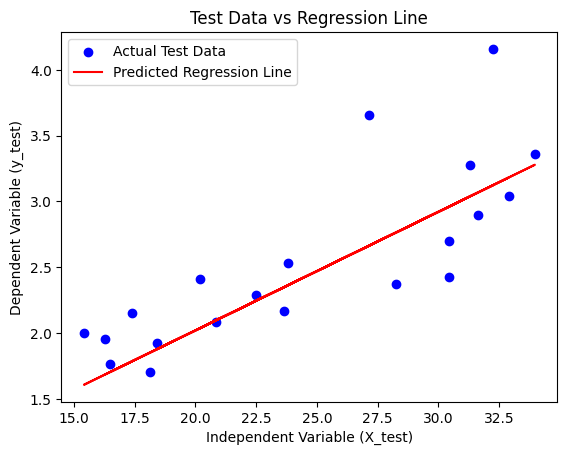

In [10]:
# Plot the test data and regression line
# Plot the test data points
plt.scatter(X_test, y_test, color='b', label='Actual Test Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='r', label='Predicted Regression Line')

# Add labels and title
plt.xlabel("Independent Variable (X_test)")
plt.ylabel("Dependent Variable (y_test)")
plt.title("Test Data vs Regression Line")
plt.legend()  # Show labels

# Display the plot
plt.show()

In [11]:
import joblib
# Saving the model  to a file
joblib.dump(model,'models/appliance_energy_model.pkl')

['models/appliance_energy_model.pkl']

In [12]:
model = joblib.load('models/appliance_energy_model.pkl')

In [13]:
model.predict([[50]])

C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.72027306])